# phase_3 project

## Analyzing the water pumps' functionality of wells in Tanzania 

### By:Esther Nyawera

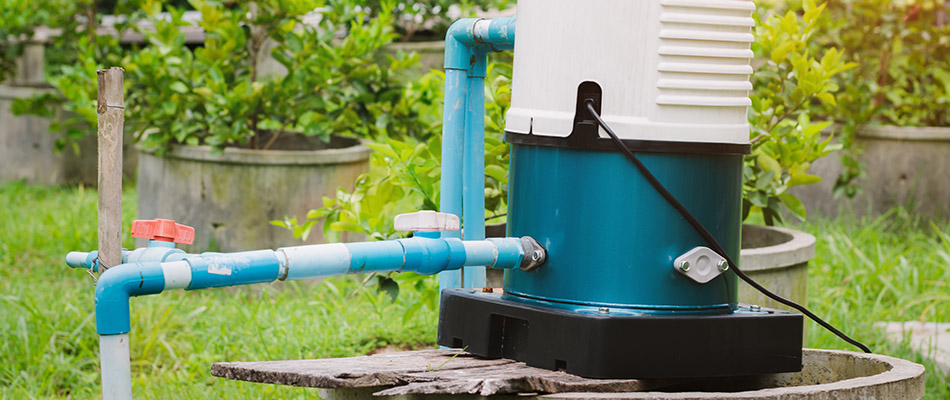

### Project overview

Tanzania, a country facing challenges in providing clean water to its over 57 million population, struggles with maintaining and repairing existing water wells. This project focuses on constructing a classifier to predict the condition of water wells across the country. By leveraging data encompassing pump types, water source,quality,quantity  and other  features, the objective is to aid NGOs or the Tanzanian government in identifying wells, their functionality and those in need of repair or maintenance. This initiative aims to enhance water accessibility and availability for the population, especially in remote or underprivileged areas.

### Problem Understanding

Water wells in Tanzania are essential for providing clean water but often suffer breakdowns or inadequate maintenance, impacting water availability. With numerous dispersed wells, systematically identifying non-functional or deteriorating ones is challenging. This project seeks to address this issue by employing machine learning to predict well conditions, facilitating targeted interventions for enhancing water infrastructure.


### Project objectives

The main aim is to create a machine learning classifier for predicting water well conditions in Tanzania, classifying wells as functional, needing repair, or non-functional based on historical data in respect to:-
   1. What aspects of the well affect functionality?
   2. Regions and the state of their wells
   3. Water quality, quantity and effects to funtionality
   4. Data provided and how well it can be used to assess and train our model


### The data. 

In this project i will use data from drivendata.org 
- -https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/
- The data in the datasetcontains information from Taarifa and the Tanzanian Ministry of Water.
With over 59,000 data points.


### Import necessary libraries

In [466]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import plot_confusion_matrix
import pickle


### Load the data

In [467]:

train_values_df= pd.read_csv('data/trainingset_values.csv')
train_labels_df = pd.read_csv('data/trainingset_labels.csv')

### Start on Data analysis

In [468]:
train_labels_df.info

<bound method DataFrame.info of           id    status_group
0      69572      functional
1       8776      functional
2      34310      functional
3      67743  non functional
4      19728      functional
...      ...             ...
59395  60739      functional
59396  27263      functional
59397  37057      functional
59398  31282      functional
59399  26348      functional

[59400 rows x 2 columns]>

In [469]:
train_labels_df.columns

Index(['id', 'status_group'], dtype='object')

In [470]:
train_values_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [471]:
train_df = pd.merge(train_labels_df, train_values_df, on='id')
train_df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [472]:
train_df.info()
train_df.columns
train_df.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

(59400, 41)

In [473]:
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


### EDA

Since we are focusing on being able to distinguish functional wells from non-functional wells, we also want a general idea of how many wells in each data set are in each status group. Although "non-functional" and "functional needs repair" wells are both generally descriptive of wells that need to be repaired, I decided to keep those groups separate in case we need to prioritize wells that are still working over those that aren't for maintenance.

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64


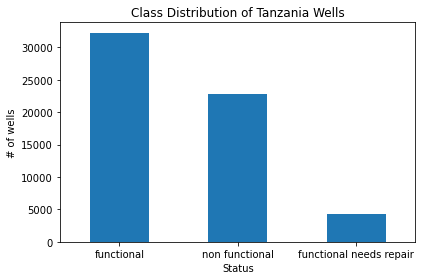

In [474]:
print(train_df['status_group'].value_counts())
train_df['status_group'].value_counts().plot(kind='bar', rot=0)
plt.title('Class Distribution of Tanzania Wells')
plt.xlabel('Status')
plt.ylabel('# of wells')
plt.tight_layout()

In [475]:
train_df = train_df.set_index('id')

In [476]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15

In [477]:
#checking for duplicates

duplicate_rows = train_df[train_df.duplicated()]

# Displaying duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Counting duplicates
duplicate_count = train_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Dropping duplicates
train_df = train_df.drop_duplicates()


Duplicate Rows:
                  status_group  amount_tsh date_recorded  \
id                                                         
23184               functional         0.0    2013-02-16   
44709               functional         0.0    2012-10-25   
69973           non functional         0.0    2012-11-04   
8342   functional needs repair         0.0    2013-02-16   
4307            non functional         0.0    2012-10-26   
61256               functional         0.0    2013-02-16   
25661               functional         0.0    2013-02-16   
4532                functional         0.0    2011-07-27   
11721               functional         0.0    2011-07-19   
68204               functional         0.0    2011-07-18   
13773           non functional         0.0    2012-10-26   
17141               functional         0.0    2011-07-27   
16417           non functional         0.0    2011-07-19   
16967               functional         0.0    2012-10-25   
3854            non func

In [478]:
train_df.shape

(59364, 40)

In [479]:
# CHECKING MISSING DATA

# function for identifying with missing values
def missing_values(data):
    """
    Identify the missing values
    Drop values that have no missing values
    Return only dara with missing values
    """
    miss_val = data.isna().sum()
    percentage = (data.isna().sum() / len(data))
    missing_values = pd.DataFrame({"Missing Values": miss_val, "In Percentage": percentage})
    missing_values.drop(missing_values[missing_values["In Percentage"] == 0].index, inplace=True)
    return missing_values
train_df = missing_values(train_df)
train_df.head()


,Missing Values,In Percentage
funder,3635,0.061232
installer,3655,0.061569
subvillage,371,0.006250
public_meeting,3314,0.055825
scheme_management,3877,0.065309


In [480]:
train_df = train_df.dropna()
train_df.head()


,Missing Values,In Percentage
funder,3635,0.061232
installer,3655,0.061569
subvillage,371,0.006250
public_meeting,3314,0.055825
scheme_management,3877,0.065309


In [481]:
# inspect after changes
train_df.describe()

,Missing Values,In Percentage
count,7.000000,7.000000
mean,6578.142857,0.110810
std,9582.643415,0.161422
min,371.000000,0.006250
25%,3185.000000,0.053652
50%,3635.000000,0.061232
75%,3766.000000,0.063439
max,28139.000000,0.474008


#### Further EDA into specific columns

In [482]:

# Convert categorical columns to numeric
train_df['construction_year'] = pd.to_numeric(train_df['construction_year'], errors='coerce')

# Calculate median of non-zero values in 'construction_year'
median = train_df.loc[train_df['construction_year'] != 0, 'construction_year'].median()

# Replace 0s in 'construction_year' with the calculated median
train_df['construction_year'].replace(0, median, inplace=True)


# Convert 'date_recorded' to year only
train_df['date_recorded'] = pd.to_datetime(train_df['date_recorded']).dt.year

# Calculate 'Age' based on 'construction_year' and 'date_recorded'
train_df['Age'] = train_df['date_recorded'] - train_df['construction_year']

# Display the DataFrame with updated columns
train_df


KeyError: 'construction_year'

In [ ]:
train_df[['construction_year', 'Age', 'date_recorded']]

,construction_year,Age,date_recorded
id,,,
69572,1999,12,2011
34310,2009,4,2013
9944,2009,2,2011
50495,2009,4,2013
53752,2000,12,2012
...,...,...,...
67885,1992,19,2011
47002,2008,5,2013
44885,1967,46,2013


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27804 entries, 69572 to 27263
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           27804 non-null  object 
 1   amount_tsh             27804 non-null  float64
 2   date_recorded          27804 non-null  int64  
 3   funder                 27804 non-null  object 
 4   gps_height             27804 non-null  int64  
 5   installer              27804 non-null  object 
 6   longitude              27804 non-null  float64
 7   latitude               27804 non-null  float64
 8   wpt_name               27804 non-null  object 
 9   num_private            27804 non-null  int64  
 10  basin                  27804 non-null  object 
 11  subvillage             27804 non-null  object 
 12  region                 27804 non-null  object 
 13  region_code            27804 non-null  int64  
 14  district_code          27804 non-null  int64  
 15

In [ ]:
#changing amount_tsh to integer since the 0s in the float are redundant
train_df['amount_tsh'] = train_df['amount_tsh'].astype('int64')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27804 entries, 69572 to 27263
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           27804 non-null  object 
 1   amount_tsh             27804 non-null  int64  
 2   date_recorded          27804 non-null  int64  
 3   funder                 27804 non-null  object 
 4   gps_height             27804 non-null  int64  
 5   installer              27804 non-null  object 
 6   longitude              27804 non-null  float64
 7   latitude               27804 non-null  float64
 8   wpt_name               27804 non-null  object 
 9   num_private            27804 non-null  int64  
 10  basin                  27804 non-null  object 
 11  subvillage             27804 non-null  object 
 12  region                 27804 non-null  object 
 13  region_code            27804 non-null  int64  
 14  district_code          27804 non-null  int64  
 15

#### Checking different columns which appear to have simmilar entries before determining which ones to drop

In [ ]:
value_counts_combined = train_df[['quality_group', 'water_quality']].apply(lambda x: x.value_counts())
value_counts_combined

,quality_group,water_quality
colored,123.0,NaN
coloured,NaN,123.0
fluoride,125.0,124.0
fluoride abandoned,NaN,1.0
good,25950.0,NaN
milky,39.0,39.0
salty,1182.0,1122.0
salty abandoned,NaN,60.0
soft,NaN,25950.0
unknown,385.0,385.0


In [ ]:
value_counts_combined = train_df[['payment','payment_type' ]].apply(lambda x: x.value_counts())
value_counts_combined

,payment,payment_type
annually,NaN,2266.0
monthly,NaN,5894.0
never pay,10034.0,10034.0
on failure,NaN,1210.0
other,205.0,205.0
pay annually,2266.0,NaN
pay monthly,5894.0,NaN
pay per bucket,6132.0,NaN
pay when scheme fails,1210.0,NaN
per bucket,NaN,6132.0


In [ ]:
value_counts_combined = train_df[['quantity','quantity_group' ]].apply(lambda x: x.value_counts())
value_counts_combined

,quantity,quantity_group
enough,16862,16862
insufficient,7060,7060
dry,2873,2873
seasonal,886,886
unknown,123,123


In [ ]:
value_counts_combined = train_df[['waterpoint_type','waterpoint_type_group' ]].apply(lambda x: x.value_counts())
value_counts_combined

,waterpoint_type,waterpoint_type_group
cattle trough,64,64.0
communal standpipe,20303,25070.0
communal standpipe multiple,4767,NaN
dam,5,5.0
hand pump,1395,1395.0
improved spring,76,76.0
other,1194,1194.0


In [ ]:
value_counts_combined = train_df[['source', 'source_type',
        'source_class' ]].apply(lambda x: x.value_counts())
value_counts_combined

,source,source_type,source_class
borehole,NaN,4572.0,NaN
dam,458.0,458.0,NaN
groundwater,NaN,NaN,18782.0
hand dtw,117.0,NaN,NaN
lake,542.0,NaN,NaN
machine dbh,4455.0,NaN,NaN
other,139.0,155.0,NaN
rainwater harvesting,291.0,291.0,NaN
river,7576.0,NaN,NaN
river/lake,NaN,8118.0,NaN


In [ ]:
value_counts_combined = train_df[['extraction_type',
        'extraction_type_group', 'extraction_type_class']].apply(lambda x: x.value_counts())
value_counts_combined

,extraction_type,extraction_type_group,extraction_type_class
afridev,198.0,198.0,NaN
cemo,89.0,NaN,NaN
climax,29.0,NaN,NaN
gravity,19610.0,19610.0,19610.0
handpump,NaN,NaN,1362.0
india mark ii,192.0,192.0,NaN
india mark iii,2.0,2.0,NaN
ksb,1159.0,NaN,NaN
mono,1777.0,1777.0,NaN
motorpump,NaN,NaN,1895.0


#### Visualization in respect to the target variable that we are trying to inspect

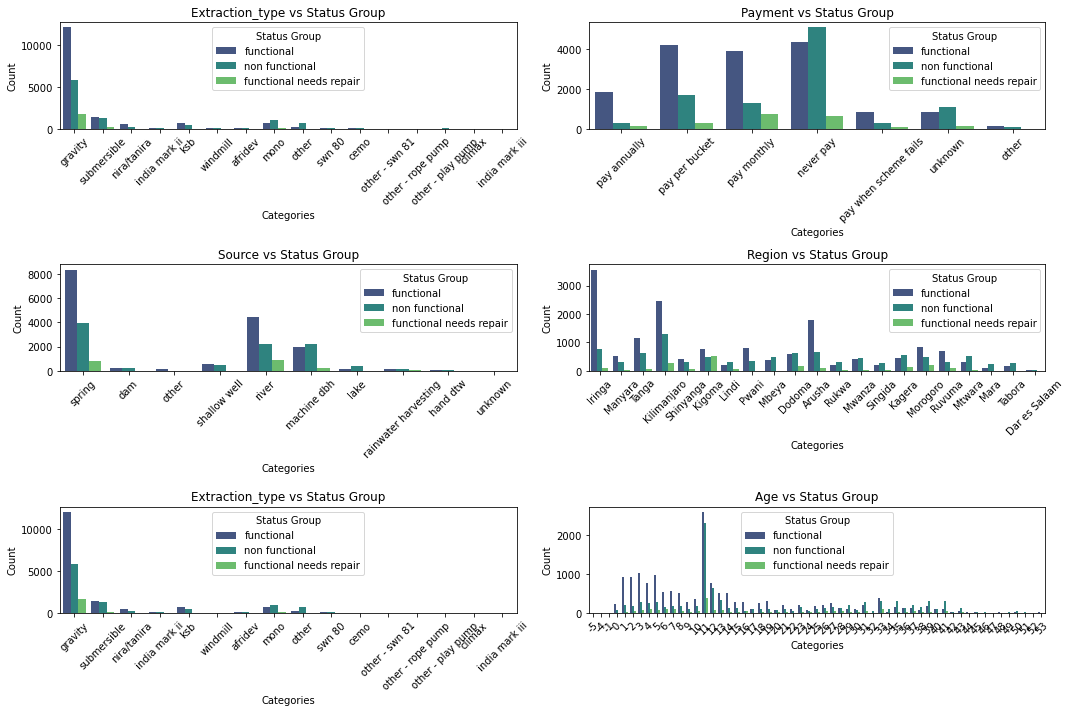

In [ ]:
columns_to_compare = ['extraction_type', 'payment','source' , 'region', 'extraction_type', 'Age']

# Create subplots for count plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Plotting count plots for each column against 'status_group' on different axes
for col, ax in zip(columns_to_compare, axes.flatten()):
    sns.countplot(data=train_df, x=col, hue='status_group', palette='viridis', ax=ax)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count')
    ax.set_title(f'{col.capitalize()} vs Status Group')
    ax.legend(title='Status Group')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

### Interpretation


From above analysis the following features can be said about the functional water pumps:-

1. Pumps that require frequent payments to use are more functional
2. Urban ares and cities have the highest number of functional pumps
3. Pump that run by gravity hence need the least maintainance are the most functional
4. Most of the functional pumps are below 15 yrs old
5. Soft water pumps are better
6. Pumps with underground sources perform better such as springs and shallow wells

### After inspection and analysis of several columns  we drop the ones which are least expected to have an effect on the training model

In [ ]:
cols_to_drop=['quantity_group','payment_type','quality_group','source_type','waterpoint_type_group', 'source_type',
        'source_class',
        'extraction_type_group','num_private','subvillage','lga','longitude','latitude','ward']
train_df=train_df.drop(columns=cols_to_drop)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27804 entries, 69572 to 27263
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   status_group           27804 non-null  object
 1   amount_tsh             27804 non-null  int64 
 2   date_recorded          27804 non-null  int64 
 3   funder                 27804 non-null  object
 4   gps_height             27804 non-null  int64 
 5   installer              27804 non-null  object
 6   wpt_name               27804 non-null  object
 7   basin                  27804 non-null  object
 8   region                 27804 non-null  object
 9   region_code            27804 non-null  int64 
 10  district_code          27804 non-null  int64 
 11  population             27804 non-null  int64 
 12  public_meeting         27804 non-null  object
 13  recorded_by            27804 non-null  object
 14  scheme_management      27804 non-null  object
 15  scheme_name    

In [ ]:
train_df.columns

Index(['status_group', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'wpt_name', 'basin', 'region', 'region_code',
       'district_code', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_class', 'management',
       'management_group', 'payment', 'water_quality', 'quantity', 'source',
       'waterpoint_type', 'Age'],
      dtype='object')

### Data Preprocessing

In this section i begin with splitting the data to training and test set.
Given that we do have categorical data i use One hot encoder to transform the data and because previosly we saw the data given in the status group was leaning more toward the functional status i chose to use SMOTE and try rectify the imbalance.

1. Splitting the data

In [ ]:

# Define X and y
y = train_df["status_group"]
X = train_df.drop(["status_group", "recorded_by", "construction_year", "funder", "installer", "wpt_name", "basin",
                   "region", "scheme_management", "management", "scheme_name", "extraction_type",
                   "extraction_type_class", "management_group", "payment", "water_quality", "quantity", "source",
                   "waterpoint_type"], axis=1)

# Transform the target variable into integers
label = LabelEncoder()
y_transformed = label.fit_transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.3, stratify=y_transformed,
                                                    random_state=42)

# Define preprocessing steps
numerical_cols = X.select_dtypes(include=["int64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["category"]).columns.tolist()

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


# consolidate onehotencoder and standardscaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply the transformations to original_df to get the transformed DataFrame
transformed_data = preprocessor.fit_transform(train_df)
new_df = pd.DataFrame(transformed_data, columns=numerical_cols + categorical_cols)


In [ ]:
new_df.columns

Index(['amount_tsh', 'date_recorded', 'gps_height', 'region_code',
       'district_code', 'population', 'Age'],
      dtype='object')

2.Creating a base model

/Users/esthernyawera/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression(max_iter=1000, random_state=42)
Accuracy: 0.6342603692160154
Precision: 0.5789652847510164
Recall: 0.6342603692160154


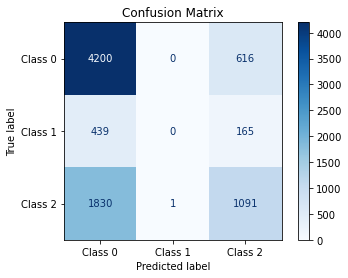

In [ ]:
base_model = LogisticRegression(random_state=42, max_iter=1000)
base_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = base_model.predict(X_test)

# evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Model: {base_model}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Plot confusion matrix
plot_confusion_matrix(base_model, X_test, y_test, cmap=plt.cm.Blues, display_labels=["Class 0", "Class 1", "Class 2"])
plt.title('Confusion Matrix')
plt.show()



### MODELLING

Here i am going to build a pipeline with the preprocessed data and train it using the following classifiers till the on with better metrics is observed:-

1. Decision tree classifier
2. KNN classifier
3. Random forest with different parameters

In [ ]:
# Define the pipeline with preprocessing and model
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier',DecisionTreeClassifier(
    criterion='entropy',  
    max_depth=5,  
    min_samples_split=2,  
    min_samples_leaf=1,  
    max_features=None  
) )
])

# Fit the pipeline (preprocessing + model) on training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display evaluation metrics for each model
print(f'classifier: {DecisionTreeClassifier}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

classifier: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Accuracy: 0.4889714696715416
Precision: 0.6215226784660483
Recall: 0.4889714696715416


In [ ]:
# Define the pipeline with preprocessing and model
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier(n_neighbors=5, metric='euclidean'))
])

# Fit the pipeline (preprocessing + model) on training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display evaluation metrics for each model
print(f'classifier: {knn}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

classifier: KNeighborsClassifier(metric='euclidean')
Accuracy: 0.6364181251498442
Precision: 0.6920359372631527
Recall: 0.6364181251498442


In [ ]:
# Define the pipeline with preprocessing and model
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(  
    criterion= 'gini',  
    max_depth=10,  
    min_samples_split=2,  
    min_samples_leaf=1, 
    bootstrap=True,  
    random_state=42  ))
])

# Fit the pipeline (preprocessing + model) on training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display evaluation metrics for each model
print(f'classifier: {RandomForestClassifier}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

classifier: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy: 0.6520019180052745
Precision: 0.7198692196672536
Recall: 0.6520019180052745


### PLOTTING CONFUSION MATRIX

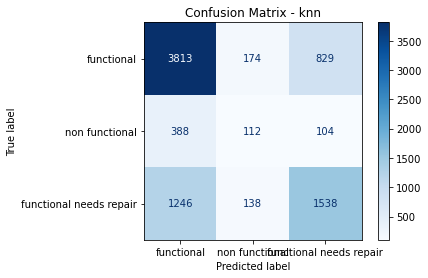

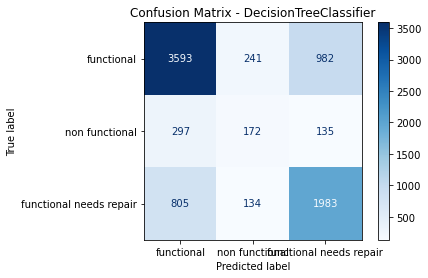

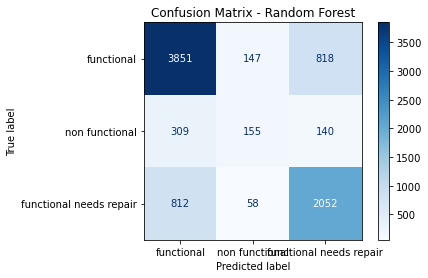

In [ ]:
# Define models and their names
models = [KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]
model_names = ['knn', 'DecisionTreeClassifier', 'Random Forest']

# Fit models, make predictions, and plot confusion matrix for each model
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)  # Fit the model with training data
    
    predictions = model.predict(X_test)  # Make predictions on the test data

    # Plot confusion matrix for each model
    disp = plot_confusion_matrix(model, X_test, y_test, 
                                 display_labels=["functional", "non functional", "functional needs repair"],
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(f"Confusion Matrix - {name}")
    plt.show()

### PICKLE BEST CLASSIFIER

Random forest classifier gives us the best metrics therefore at this point it is advisable to save and store it for future retrival when making predictions on sample data.


In [ ]:
# Save the trained model to a file using pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(RandomForestClassifier, file)


#### INTERPRETATION
1. The Random Forest Classifier outperforms the other models, exhibiting the highest accuracy, precision, and recall rates.

    #### RandomForestClassifier
    
Accuracy: 65%

Precision: 72%

Recall: 65%



### CONCLUSION

- Most of the functional wells are found in the city where people mostly pay to use them. More wells similar to those in the city should be built in other region with focus on pumps that will work on gravity.

- The wells that were recorded a long time ago most are non functional and in need of repairs this is to show they have been neglected.

- Wells that run on soft water sources the most functional.






### RECOMMENDATION

- Build more wells resembling those in urban areas in other regions that experience water shortage, especially focusing on implementing pumps that operate using gravity and have soft water sources. This replication strategy might enhance the functionality of wells in other areas 
- Increase attention and maintenance of older wells to prevent deterioration and improve their functionality.


### NEXT STEPS
- Further exploration into wider scopes of data and analysis of different features on how they affect functionality
- Develop a strong strategy on well maintenance and repairs
- Implement recommendations